# Classify Electric Moped Reviews


## Background
EMO is a manufacturer of electric motorcycles.

EMO launched its first electric motorcycle in India in 2019.

The product team has been asking website users to rate the motorcycles.

Ratings from owners help the product team to improve the quality of the motorcycles.

Ratings from non-owners help the product team add new features. They hope the new features will increase the number of new ustomers.

The product team wants to extend the survey. But, they want to be sure they can predict whether the ratings came from owners or non-owners.

# Data Validation

The dataset contains 1500 rows and 8 columns with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:
- owned: Same as description without missing values. Nominal with 2 categories - the reviewer owns the moped (1) or not (0). I convert it into 'category' data type.
- make_model: same as description without missing values. Nominal with 6 categories (Nielah-Eyden, Nielah-Keetra, Lunna-Keetra, Hoang-Keetra, Lunna-Eyden, Hoang-Eyden). I convert it into 'category' data type.
- review_month:  without missing values, but not all rows contain month names in English short format (Jan,Feb, Mar, Apr etc.).  I replace inconsistent values with English short format  and I convert it into category data type.
- web_browser:  150+ missing values, so I replace missing values with 'unknown' and convert it into category data type. Nominal with 7 categories - web browser used by the user leaving the review, one of Chrome, IE, Firefox, Safari, Android, Opera, unknown. 
- reviewer_age: 105+ missing values labeled with ‘-’., so I replace missing values with the average age and convert it into 'int16' data type. Discrete - age of the user leaving the review. 
- primary_use: same as description without missing values. Nominal with 2 categories - One of Commuting or Leisure. I convert it into 'category' data type.
- value_for_money:  without missing values, but the values are not numeric, so I remap incorrect categories to correct ones and I convert it into ordered categories.  Discrete - Rating given by the user on value for money of the bike from 1 to 10. 
- overall_rating: same as description without missing values. I convert it into 'float16' data type.  Continuous - total rating score after combining multiple rating scores, values from 0 to 25. 

**The resultant dataset contains 1500 rows and 8 columns.**  The dataset contains both numeric and non-numeric data, specifically the features 4, 6 and 7 contain numeric values (of types int16, category and float16, respectively) and all the other features contain non-numeric values (of types category). 

**Original Dataset**

In [1]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("electric_bike_ratings_2212.csv")

# Print DataFrame information
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB
None


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [2]:
# Inspect data in 'owned' column.
display(df['owned'].isna().sum())
print(df['owned'].value_counts(), '\n' , df['owned'].value_counts(normalize =True))

0

1    890
0    610
Name: owned, dtype: int64 
 1    0.593333
0    0.406667
Name: owned, dtype: float64


In [3]:
# Change the data type of 'make_model' to 'category'
df['owned'] = df['owned'].astype('category')
df['owned'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [4]:
# Inspect data in 'make_model' column.
display(df['make_model'].isna().sum())
df['make_model'].value_counts()

0

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64

In [5]:
# Change the data type of 'make_model' to 'category'
df['make_model'] = df['make_model'].astype('category')
df['make_model'].dtypes

CategoricalDtype(categories=['Hoang-Eyden', 'Hoang-Keetra', 'Lunna-Eyden', 'Lunna-Keetra',
                  'Nielah-Eyden', 'Nielah-Keetra'],
, ordered=False)

In [6]:
# Inspect data in 'review_month' column.
display(df['review_month'].isna().sum())
df['review_month'].value_counts()

0

Sep       73
Mar       72
May       68
Nov       67
Apr       65
          ..
10-Jul     1
18-Aug     1
14-Apr     1
20-Sep     1
06-Aug     1
Name: review_month, Length: 332, dtype: int64

In [7]:
# Replace inconsistent values with English short format month names
df['review_month'] = [x.split('-')[1] if len(x)>3 else x for x in df['review_month']]
display(len(df['review_month'].value_counts()))
df['review_month'].value_counts()

12

Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64

In [8]:
# Change the data type of 'review_month' to 'category'
df['review_month'] = df['review_month'].astype('category')
df['review_month'].dtypes

CategoricalDtype(categories=['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
, ordered=False)

In [9]:
# Inspect data in 'web_browser' column.
display(df['web_browser'].isna().sum())
df['web_browser'].value_counts()

150

Chrome     698
IE         239
Firefox    233
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

In [10]:
# Replace missing values with 'unknown' and change the data type to 'category'
df['web_browser'] = df['web_browser'].fillna('unknown')
df['web_browser'] = df['web_browser'].astype('category')
display(df['web_browser'].dtypes)
df['web_browser'].value_counts()

CategoricalDtype(categories=['Android', 'Chrome', 'Firefox', 'IE', 'Opera', 'Safari',
                  'unknown'],
, ordered=False)

Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

In [11]:
# Inspect data in 'owned' column.
display(df['reviewer_age'].isna().sum())
df['reviewer_age'].value_counts()

0

-     105
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
23     43
16     43
48     42
46     41
21     41
22     40
33     39
26     39
36     39
24     39
25     38
27     38
42     37
47     37
31     36
28     36
43     36
29     35
50     33
34     32
35     31
32     30
38     28
49     26
Name: reviewer_age, dtype: int64

In [12]:
# Impute the missing values with mean imputation and change the data type to 'int16'
import numpy as np
df['reviewer_age'] = df['reviewer_age'].replace('-', np.nan).astype('float16')
df['reviewer_age'].fillna(df['reviewer_age'].mean(), inplace=True)
df['reviewer_age'] = df['reviewer_age'].astype('int16')
display(df['reviewer_age'].dtypes)
df['reviewer_age'].value_counts()

dtype('int16')

32    135
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
16     43
23     43
48     42
21     41
46     41
22     40
36     39
33     39
24     39
26     39
25     38
27     38
42     37
47     37
43     36
28     36
31     36
29     35
50     33
34     32
35     31
38     28
49     26
Name: reviewer_age, dtype: int64

In [13]:
# Inspect data in 'primary_use' column.
display(df['primary_use'].isna().sum())
df['primary_use'].value_counts()

0

Commuting    1095
Leisure       405
Name: primary_use, dtype: int64

In [14]:
# Change the data type of 'primary_use' to 'category'
df['primary_use'] = df['primary_use'].astype('category')
df['primary_use'].dtypes

CategoricalDtype(categories=['Commuting', 'Leisure'], ordered=False)

In [15]:
# Inspect data in 'value_for_money' column.
display(df['value_for_money'].isna().sum())
df['value_for_money'].value_counts()

0

5/10     387
6/10     323
4/10     315
3/10     183
7/10     167
2/10      53
8/10      52
1/10      11
9/10       8
10/10      1
Name: value_for_money, dtype: int64

In [16]:
# remap incorrect categories to correct ones and convert into ordered categories
df['value_for_money'] = df['value_for_money'].replace({'5/10':5, '4/10':4, '3/10':3, 
                                                       '7/10':7, '6/10':6, '2/10':2,'9/10':9,
                                                       '8/10':8, '10/10':10, '1/10':1})
df['value_for_money'] = df['value_for_money'].astype('category').cat.reorder_categories(
    new_categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered =True)
df['value_for_money'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=True)

In [17]:
# Inspect data in 'overall_rating' column.
display(df['overall_rating'].isna().sum())
df['overall_rating'].nunique()

0

583

In [18]:
# Change the data type to 'float16'
df['overall_rating'] = df['overall_rating'].astype('float16')
print(df['overall_rating'].dtypes, '\n', df['overall_rating'].min(), '\n',  df['overall_rating'].max())

float16 
 11.69 
 22.77


In [19]:
# Inspect the resultant dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   owned            1500 non-null   category
 1   make_model       1500 non-null   category
 2   review_month     1500 non-null   category
 3   web_browser      1500 non-null   category
 4   reviewer_age     1500 non-null   int16   
 5   primary_use      1500 non-null   category
 6   value_for_money  1500 non-null   category
 7   overall_rating   1500 non-null   float16 
dtypes: category(6), float16(1), int16(1)
memory usage: 16.3 KB


In [20]:
# Print summary statistics
df.describe()

,reviewer_age,overall_rating
count,1500.000000,1500.000000
mean,32.556000,17.140625
std,9.876769,2.445312
min,16.000000,11.687500
25%,24.000000,15.320312
50%,32.000000,18.234375
75%,41.000000,18.843750
max,50.000000,22.765625


# Exploratory Analysis

From Graph 1, we can see the proportion of the minority class (1), indicating the reviewers who owns the moped, is about 41%. Therefore, the imbalanced class issue is mild, so I decided not to address this issue at this point.

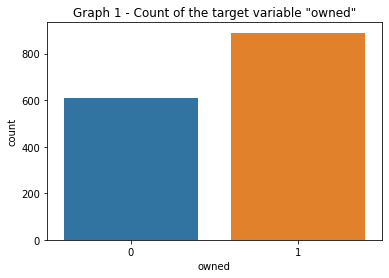

In [21]:
# Create a count plot of the target variable - owned
g = sns.countplot(x="owned", data=df)
g.set_title('Graph 1 - Count of the target variable "owned"')
plt.show()

From Graph 2 we can see the distribution of the variable - overall_rating:

- we don't see outliers, the range of values is between 11 and 23. 
- the reviews with a total rating score of 19 are the most numerous (around 350 from which 250 are reviewers who owns the moped and 100 are reviewers who don't owns the moped).

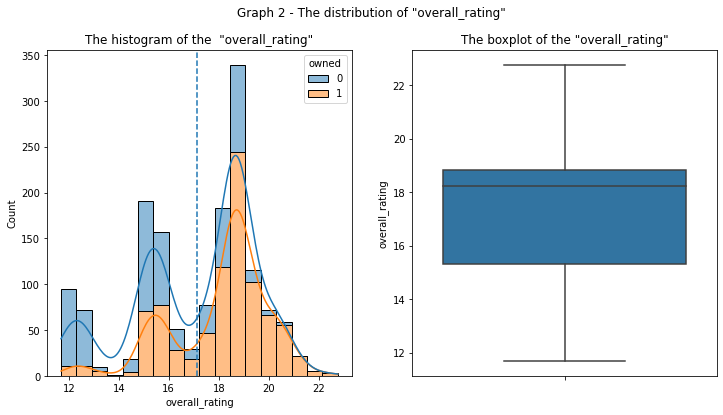

In [22]:
# Create a historgram and a boxplot of the variable - overall_rating
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(12,6))
sns.histplot(data =df, x='overall_rating', hue="owned", stat='count', kde=True,  multiple="stack", ax=ax0).set(title = 'The histogram of the  "overall_rating"')
sns.boxplot(y='overall_rating', data = df,  hue="owned", ax=ax1).set(title = 'The boxplot of the "overall_rating"')
ax0.axvline(x=df['overall_rating'].mean(), label='Mean', linestyle='--')
fig.suptitle('Graph 2 - The distribution of "overall_rating"')
plt.show()

From **Graph 3** we can see the distribution of the variable - reviewer_age :

- we don't see outliers, the range of values is between 16 and 50.
- the reviews with an age of 32 are the most numerous (around 135 from which 80 are reviewers who owns the moped and 55 are reviewers who don't owns the moped).

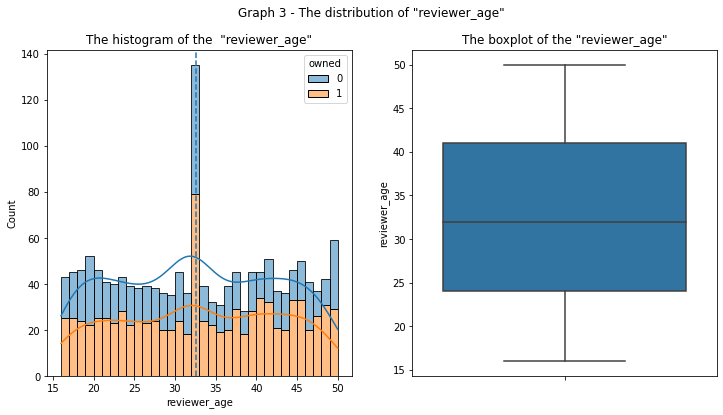

In [23]:
# Create a historgram and a boxplot of the  variable - reviewer_age 
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(12,6))
sns.histplot(data =df, x='reviewer_age', hue="owned", stat='count', kde=True, label = "owned", bins = 34,  multiple="stack",  ax=ax0).set(title = 'The histogram of the  "reviewer_age"')
sns.boxplot(y='reviewer_age', data = df,  ax=ax1).set(title = 'The boxplot of the "reviewer_age"')
ax0.axvline(x=df['reviewer_age'].mean(), label='Mean', linestyle='--')
fig.suptitle('Graph 3 - The distribution of "reviewer_age"')
plt.show()


From **Graph 4** - 'The boxplot between ownership and overall rating: we can tell from the boxplot that the reviewers who don't owns the moped have a lower total score than the reviewers who owns the moped. The median and the mean of the reviewers holding the moped is higher than the overall rating and the median and the mean of the reviewers not holding the moped is lower. We can also see that the interquartile range is greater on the overall rating of reviewers who don't owns the moped, which means that for this category the overall rating has a greater variation.

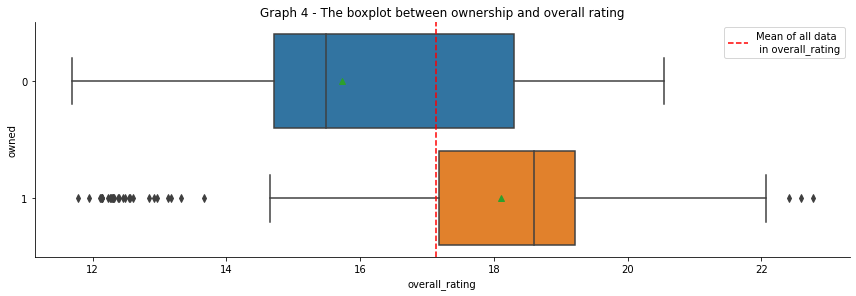

In [24]:
# Create a boxplot between ownership and overall rating showing the mean value for each group and the quartiles 
cat = sns.catplot(data=df, x="overall_rating", y ='owned', kind ='box', showmeans=True, height=4, aspect=3).set(
    title = 'Graph 4 - The boxplot between ownership and overall rating')
plt.axvline(x=df['overall_rating'].mean(), label='Mean of all data \n in overall_rating', linestyle='--', color = 'r')
plt.legend()
plt.show()

From **Graph 5** - The boxplot between ownership and reviewer_age: we can see that the interquartile range is greater for the age of reviewers who don't owns the moped, which means that for this category the age variation is greater.

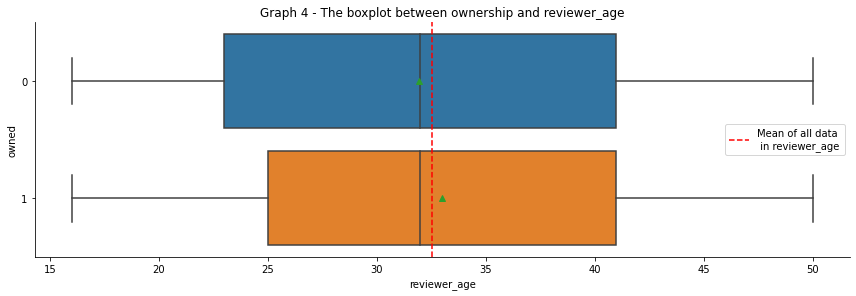

In [25]:
# Create a boxplot between ownership and reviewer_age showing the mean value for each group and the quartiles 
cat = sns.catplot(data=df, x="reviewer_age", y ='owned', kind ='box', showmeans=True, height=4, aspect=3).set(
    title = 'Graph 4 - The boxplot between ownership and reviewer_age')
plt.axvline(x=df['reviewer_age'].mean(), label='Mean of all data \n in reviewer_age', linestyle='--', color = 'r')
plt.legend()
plt.show()

From **Graph 6** we can see that the distribution of the variable 'value_for_money' has the shape of a normal distribution, and the value_for_money the most frequent is 5 (about 390 reviewers give this rating from which 240 are reviewers who owns the moped and 150 are reviewers who don't owns the moped). The reviewers who don't owns the moped give a lower rating than the reviewers who owns the moped.

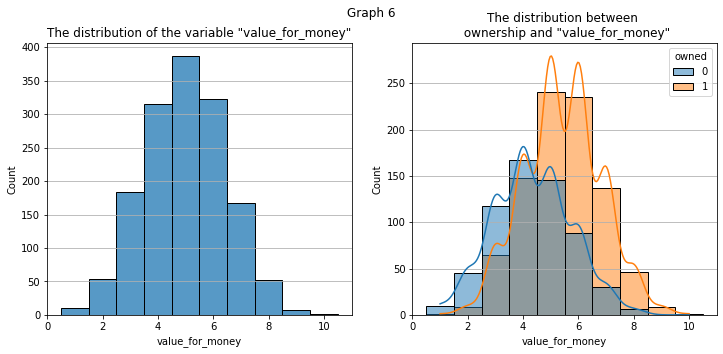

In [26]:
# Create a historgram  of the  variable - value_for_money
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))
sns.histplot(df['value_for_money'], stat='count',  bins = 10,  ax=ax0).set(title = 'The distribution of the variable "value_for_money"')
ax0.grid(axis="y")
sns.histplot(data =df, x='value_for_money', hue="owned", stat='count',  kde=True,  ax=ax1).set(title = 'The distribution between \n ownership and "value_for_money"')
ax1.grid(axis="y")
fig.suptitle('Graph 6')
plt.show()

In [27]:
df['make_model'].value_counts()

Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Eyden      124
Hoang-Keetra     124
Nielah-Keetra     93
Name: make_model, dtype: int64

From **Graph 7** we can see that the model that has the most reviews is Nielah_Eyden  (around 650 from which 500 are reviewers who owns the moped and 150 are reviewers who don't owns the moped). The models Nielah-Eyden, Nielah-Keetra, Hoang-Eyden and Hoang-Keetra have more reviews from reviewers who owns the moped, the models Lunna-Eyden and Lunna-Keetra have more reviews from reviewers who don't owns the moped.

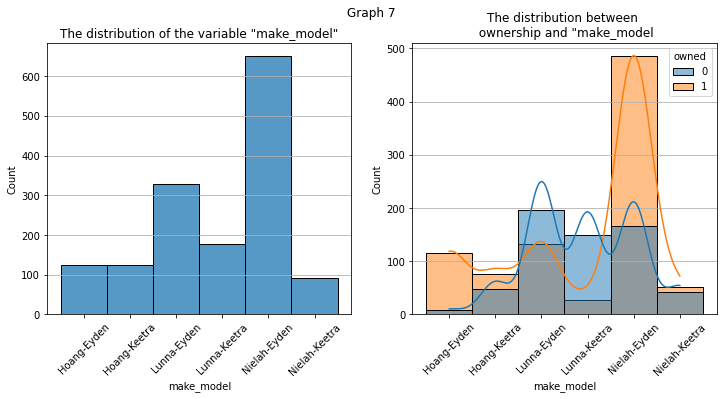

In [28]:
# Create a barplot of the  variable - make_model
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))
sns.histplot(df['make_model'], stat='count',  bins = 6,  ax=ax0).set(title = 'The distribution of the variable "make_model"')
ax0.xaxis.set_tick_params(rotation=45)
ax0.grid(axis="y")
sns.histplot(data =df, x='make_model', hue="owned", bins = 6, stat='count',  kde=True, ax=ax1).set(title = 'The distribution between \n ownership and "make_model')
ax1.grid(axis='y')
ax1.xaxis.set_tick_params(rotation=45)
fig.suptitle('Graph 7')
plt.show()

From **Graph 8** we can see that the months with the most reviews are March and September, follow by May.

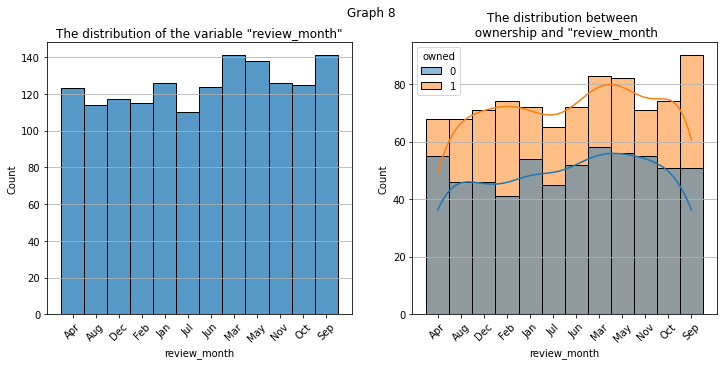

In [29]:
# Create a barplot of the  variable - review_month
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))
sns.histplot(df['review_month'], stat='count',  bins = 10,  ax=ax0).set(title = 'The distribution of the variable "review_month"')
ax0.xaxis.set_tick_params(rotation=45)
ax0.grid(axis='y')
sns.histplot(data =df, x='review_month', hue="owned", stat='count', kde=True,  ax=ax1).set(title = 'The distribution between \n ownership and "review_month')
ax1.xaxis.set_tick_params(rotation=45)
ax1.grid(axis='y')
fig.suptitle('Graph 8')
plt.show()

From **Graph 9** we can see that the most used web browser by the user leaving the review  is Chrome, followed by Firefox and IE.

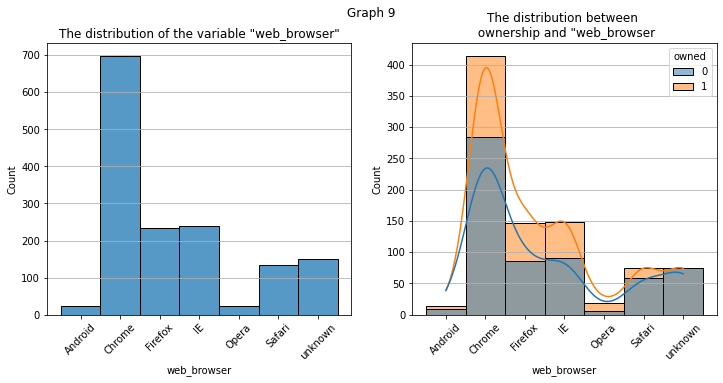

In [30]:
# Create a barplot of the  variable - web_browser
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))
sns.histplot(df['web_browser'], stat='count',  bins = 10,  ax=ax0).set(title = 'The distribution of the variable "web_browser"')
ax0.xaxis.set_tick_params(rotation=45)
ax0.grid(axis='y')
sns.histplot(data =df, x='web_browser', hue="owned", stat='count',  kde=True, ax=ax1).set(title = 'The distribution between \n ownership and "web_browser')
ax1.xaxis.set_tick_params(rotation=45)
ax1.grid(axis='y')
fig.suptitle('Graph 9')
plt.show()

From **Graph 10** we can see that reviewers who use the moped for commuting are more numerous than those who use it for leisure.

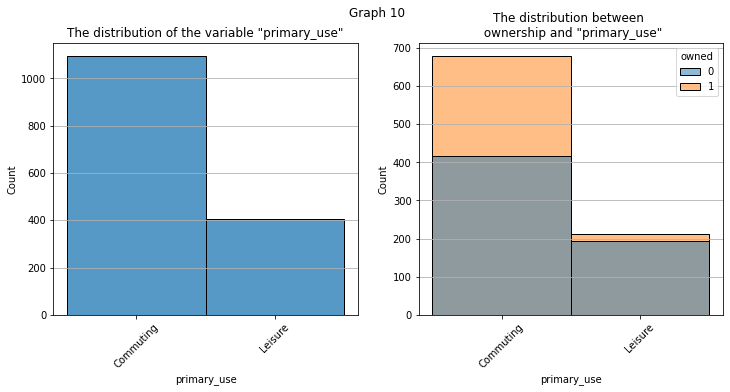

In [31]:
# Create a barplot of the  variable - web_browser
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12, 5))
sns.histplot(df['primary_use'], stat='count',  bins = 10,  ax=ax0).set(title = 'The distribution of the variable "primary_use"')
ax0.xaxis.set_tick_params(rotation=45)
ax0.grid(axis='y')
sns.histplot(data =df, x='primary_use', hue="owned", stat='count',  ax=ax1).set(title = 'The distribution between \n ownership and "primary_use"')
ax1.xaxis.set_tick_params(rotation=45)
ax1.grid(axis='y')
fig.suptitle('Graph 10')
plt.show()

# Analyze and Build Models

## Preprocessing the data
Predicting whether a review came from an owner or not is a **classification task** in machine learning. 

 Before I proceed towards building a machine learning model I will do tow preprocessing steps: 
-  Convert the non-numeric data into numeric,  I will do this by using the get_dummies() method from pandas.
-  Scale the feature values to a uniform range, I will do thnis by using MinMax-Scaler (rescales the data set such that all feature values are in the same range 0–1). 

In [32]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Create features
features = df.drop(columns = ["owned"], axis = 1)

# Create labels
labels = df["owned"].values

# Split our data
features_train, features_test = train_test_split(features, test_size=0.25,  random_state = 43)
y_train, y_test = train_test_split(labels, test_size=0.25, random_state = 43)
print(features_train.shape, features_test.shape, y_train.shape, y_test.shape)

(1125, 7) (375, 7) (1125,) (375,)


In [33]:
# Convert the categorical features in the train and test sets independently
features_train = pd.get_dummies(features_train,  columns =['make_model', 'review_month', 'web_browser', 'primary_use'],  drop_first = True)
features_test = pd.get_dummies(features_test,  columns =['make_model', 'review_month', 'web_browser', 'primary_use'], drop_first = True)

# Reindex the columns of the test set aligning with the train set
features_test = features_test.reindex(columns=features_train.columns, fill_value=0)
print({features_train.info()})
print({features_test.info()})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 928 to 1344
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   reviewer_age              1125 non-null   int16   
 1   value_for_money           1125 non-null   category
 2   overall_rating            1125 non-null   float16 
 3   make_model_Hoang-Keetra   1125 non-null   uint8   
 4   make_model_Lunna-Eyden    1125 non-null   uint8   
 5   make_model_Lunna-Keetra   1125 non-null   uint8   
 6   make_model_Nielah-Eyden   1125 non-null   uint8   
 7   make_model_Nielah-Keetra  1125 non-null   uint8   
 8   review_month_Aug          1125 non-null   uint8   
 9   review_month_Dec          1125 non-null   uint8   
 10  review_month_Feb          1125 non-null   uint8   
 11  review_month_Jan          1125 non-null   uint8   
 12  review_month_Jul          1125 non-null   uint8   
 13  review_month_Jun          1125 non-null   uint

In [34]:
# change the order of the columns, putting the numerical futures first
features_train.columns = features_test.columns = ['reviewer_age', 'overall_rating', 'value_for_money', 'make_model_Hoang-Keetra',
        'make_model_Lunna-Eyden', 'make_model_Lunna-Keetra', 'make_model_Nielah-Eyden', 'make_model_Nielah-Keetra',
        'review_month_Aug', 'review_month_Dec','review_month_Feb', 'review_month_Jan', 'review_month_Jul',
        'review_month_Jun', 'review_month_Mar', 'review_month_May', 'review_month_Nov', 'review_month_Oct', 'review_month_Sep',
        'web_browser_Chrome', 'web_browser_Firefox', 'web_browser_IE', 'web_browser_Opera', 'web_browser_Safari',
        'web_browser_unknown', 'primary_use_Leisure']

In [35]:
 # Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
features_train[['reviewer_age', 'overall_rating']] = scaler.fit_transform(features_train[['reviewer_age', 'overall_rating']])
features_test[['reviewer_age', 'overall_rating']] = scaler.transform(features_test[['reviewer_age', 'overall_rating']])
display(features_train.describe())
features_test.describe()

,reviewer_age,overall_rating,value_for_money,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Aug,review_month_Dec,...,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Leisure
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,...,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.488758,0.442667,17.156250,0.088000,0.209778,0.116444,0.435556,0.066667,0.080000,0.064889,...,0.085333,0.086222,0.092444,0.476444,0.150222,0.156444,0.015111,0.090667,0.095111,0.277333
std,0.290441,0.163698,2.417969,0.283421,0.407331,0.320900,0.496050,0.249555,0.271414,0.246439,...,0.279501,0.280817,0.289781,0.499667,0.357448,0.363438,0.122049,0.287262,0.293499,0.447882
min,0.000000,0.000000,11.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.333333,15.382812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.470588,0.444444,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735294,0.555556,18.812500,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,22.593750,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,reviewer_age,overall_rating,value_for_money,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Aug,review_month_Dec,...,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Leisure
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.00000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.481490,0.439704,17.093750,0.066667,0.248000,0.125333,0.432000,0.048000,0.06400,0.117333,...,0.080000,0.074667,0.098667,0.432000,0.170667,0.168000,0.018667,0.082667,0.114667,0.248000
std,0.290969,0.169594,2.529297,0.249777,0.432429,0.331539,0.496016,0.214052,0.24508,0.322247,...,0.271656,0.263204,0.298612,0.496016,0.376720,0.374366,0.135526,0.275746,0.319045,0.432429
min,0.000000,0.000000,11.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.333333,15.222656,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.470588,0.444444,18.203125,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735294,0.555556,18.945312,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.888889,22.765625,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection
I will  get feature importance using forward feature selection (or sequential forward feature selection — SFS), this is an iterative method in which we start by evaluating all features individually, and then select the one that results in the best performance.
In the second step, it tests all possible combinations of the selected feature with the remaining features and retains the pair that produces the best algorithmic performance. And the loop continues by adding one feature at a time in each iteration until the pre-set criterion is reached.

In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# create the model with which we want to evaluate our features
model = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=43)

# create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(model, 
                 k_features=20, 
                 forward=True, 
                 floating=False,
                 verbose=0,               
                 scoring='f1_macro',
                 cv=5,
                 n_jobs=-1)

# fit the object to the training data
sfs = sfs.fit(features_train, y_train)
selected_features = features_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

Index(['reviewer_age', 'overall_rating', 'value_for_money',
       'make_model_Lunna-Keetra', 'make_model_Nielah-Eyden',
       'review_month_Aug', 'review_month_Dec', 'review_month_Feb',
       'review_month_Jan', 'review_month_Jul', 'review_month_Jun',
       'review_month_Mar', 'review_month_May', 'review_month_Nov',
       'review_month_Oct', 'web_browser_Firefox', 'web_browser_IE',
       'web_browser_Opera', 'web_browser_unknown', 'primary_use_Leisure'],
      dtype='object')


In [37]:
# Segregate features and labels into separate variables
X_train, X_test  = features_train[selected_features].values, features_test[selected_features].values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1125, 20), (375, 20), (1125,), (375,))

## Baseline Model - Logistic Regression

In [38]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(C=5, max_iter=1000, random_state=43)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

## Comparision Model - Gradient Boosting Classifier

In [39]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Train our Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.08, subsample=0.9, n_estimators=150, max_depth=2, random_state=43)
gbc.fit(X_train, y_train)

# Predict the labels for the test data
pred_gbc = gbc.predict(X_test)

I chose the **Logistic Regression** model as a baseline model because it is  easy to implement and interpret. It is less prone to overfitting than other more complex models, making it a good choice for datasets with a small number of samples. 
The comparison model I am choosing is the **Gradient Boosting Classifier** model because it is known for its high accuracy and predictive power, can handle well non-linear relationships between features and target variables and beacause can handle a wide range of data types, including numerical, categorical, and binary data.

## Evaluation of the two models

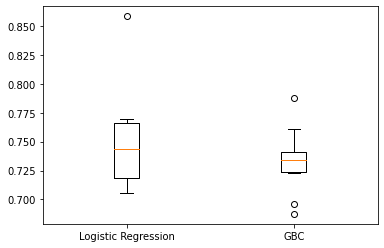

In [40]:
# Visualizing classification model performance
from sklearn.model_selection import KFold, cross_val_score

# Create models dictionary
models = {"Logistic Regression":LogisticRegression(), "GBC": GradientBoostingClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
    # Instantiate a KFold object
    kf = KFold(n_splits=10, random_state=10, shuffle=True)
  
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

We see that linear regression perfom better. It would be appropriate to select this model; however, I will check predictive performance on the test set to see if either one can outperform the other.

In [41]:
# Create the classification report for both models
from sklearn.metrics import classification_report, confusion_matrix
class_rep_logreg = classification_report(y_test, pred_logreg)
class_rep_gbc = classification_report(y_test, pred_gbc)

print("Logistic Regression: \n", class_rep_logreg)
print("Gradient Boosting Classifier: \n", class_rep_gbc)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.66       156
           1       0.75      0.82      0.78       219

    accuracy                           0.74       375
   macro avg       0.73      0.72      0.72       375
weighted avg       0.73      0.74      0.73       375

Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       156
           1       0.77      0.84      0.80       219

    accuracy                           0.76       375
   macro avg       0.76      0.74      0.75       375
weighted avg       0.76      0.76      0.76       375



I  chose  **classification report** to evaluate the model because provides a detailed evaluation of the model's performance, including precision, recall, F1-score, and support, for each class in the classification problem. By analyzing the precision, recall, and F1-score for each class, we can identify the strengths and weaknesses of the model. This can help us fine-tune the model and improve its overall performance.

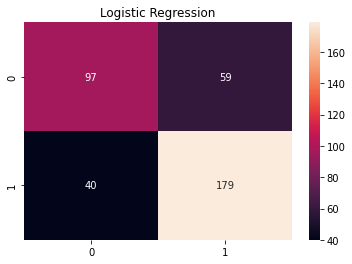

In [42]:
# Visualizing the  confusion_matrix for Logistic Regression model
sns.heatmap(confusion_matrix(y_test, pred_logreg), annot=True, fmt='d').set(title='Logistic Regression')
plt.show()

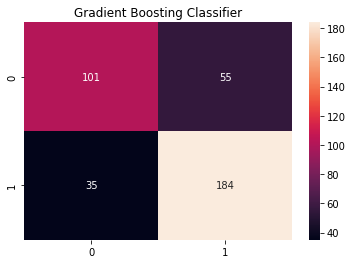

In [43]:
# Visualizing the confusion_matrix for Gradient Boosting Regressor model
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, fmt='d').set(title='Gradient Boosting Classifier')
plt.show()

When interpreting a classification report, it's important to look at the metrics for each class in the classification problem, as well as the overall metric. A higher **accuracy** value indicates the model has a higher accuracy in prediction, but it behaves badly with unbalanced datasets. **Recall** determines what proportion of positive results was detected by the classifier. **Precision** is a measure that focuses only on positive examples - it tells how much of the results indicated by the classifier as positive is actually positive. **F1 Score** is the harmonic mean of precision and sensitivity, generally - the higher the F1-score, the better the classifier.

Therefore, the Gradient Boosting Regressor model is slightly more accurate that the Logistic Regressionl model with an accuracy of 76% and a better F1 Score, a better precision and  a better recall for both classes. The confusion matrix shows that 285 items were correctly predicted by Gradient Boosting Regressor model a little better than the Logistic Regressionl model that  correctly predicted  276 items. 

# Tuning our models using GridSearchCV

We'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. 

In [44]:
# Define params_logreg
params_logreg = {'C': [2, 5, 10], 'max_iter': [100, 5000, 1000],'penalty': ['l1', 'l2', 'elasticnet'], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_logreg = GridSearchCV(estimator=logreg, param_grid=params_logreg, cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
yt_train = y_train.reshape(-1, 1)
yt_test = y_test.reshape(-1, 1)
grid_logreg.fit(X_train, yt_train)

# Summarize results
print('Tuned Logistic Regression parameters:', grid_logreg.best_params_)
print('Tuned Logistic Regression best accuracy score:', round(grid_logreg.best_score_, 2))
print('10-fold CV Logistic Regression  mean accuracy score:', round(results[0].mean(), 2))

Tuned Logistic Regression parameters: {'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression best accuracy score: 0.76
10-fold CV Logistic Regression  mean accuracy score: 0.75


In [45]:
# Define params_dt
params_gbc = {'learning_rate': [0.02, 0.05, 0.08, 0.1, 0.2], 'subsample':[0.3, 0.5, 0.7, 0.9], 'n_estimators':[50, 100, 150, 200],
             'max_depth': [1, 2, 3, 4, 5], 'min_samples_leaf': [0.10, 0.30, 0.50, 0.70, 0.90]}

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_gbc = GridSearchCV(estimator=gbc, param_grid=params_gbc , cv=10, n_jobs=-1)

# Fit 'grid_dt' to the training data
grid_gbc.fit(X_train, yt_train)

# Summarize results
print('Tuned Gradient Boosting Classifier parameters:', grid_gbc.best_params_)
print('Tuned Gradient Boosting Classifier Accuracy Score:', round(grid_gbc.best_score_, 2))
print('10-fold CV Gradient Boosting Classifier mean accuracy score:', round(results[1].mean(), 2))

Tuned Gradient Boosting Classifier parameters: {'learning_rate': 0.05, 'max_depth': 1, 'min_samples_leaf': 0.1, 'n_estimators': 100, 'subsample': 0.9}
Tuned Gradient Boosting Classifier Accuracy Score: 0.76
10-fold CV Gradient Boosting Classifier mean accuracy score: 0.73


The train set accuracy of our tuned models are both roughly equal to 76% and are greater than 10-fold CV accuracy mean.

In [46]:
# Extract the best estimator
best_model_logreg = grid_logreg.best_estimator_
best_model_gbc = grid_gbc.best_estimator_

# Predict test set labels
yb_pred = best_model_logreg.predict(X_test)
yc_pred = best_model_gbc.predict(X_test)

# Evaluate it on the test set
print("Classification report of tuned logistic regression classifier: \n ", classification_report(yt_test, yb_pred))
print("Classification report of tuned Gradient Boosting Classifier: \n ", classification_report(yt_test, yc_pred))

Classification report of tuned logistic regression classifier: 
                precision    recall  f1-score   support

           0       0.71      0.60      0.65       156
           1       0.74      0.83      0.78       219

    accuracy                           0.73       375
   macro avg       0.73      0.71      0.72       375
weighted avg       0.73      0.73      0.73       375

Classification report of tuned Gradient Boosting Classifier: 
                precision    recall  f1-score   support

           0       0.71      0.60      0.65       156
           1       0.74      0.83      0.78       219

    accuracy                           0.73       375
   macro avg       0.73      0.71      0.71       375
weighted avg       0.73      0.73      0.73       375



The test set accuracy of our tuned models are both roughly equal to 73% and are slightly smaller than the train set accuracy, showing that our models are a little overfitting.

# Performing classification with neural networks

## MLPClassifier

In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
cls_model = MLPClassifier(
    hidden_layer_sizes=(80, 40, 20),
    activation='logistic',
    solver='adam',
    random_state=42,
    max_iter=400,
    batch_size=40)
cls_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', batch_size=40,
              hidden_layer_sizes=(80, 40, 20), max_iter=400, random_state=42)

In [49]:
# Perform cross-validation
cv_results = cross_val_score(cls_model, X_train, y_train, cv=kf)
print('10-fold CV MLPClassifier mean accuracy score:', round(cv_results.mean(), 2))

10-fold CV MLPClassifier mean accuracy score: 0.74


In [50]:
y_pred_mlp = cls_model.predict(X_test)
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       156
           1       0.78      0.80      0.79       219

    accuracy                           0.75       375
   macro avg       0.74      0.74      0.74       375
weighted avg       0.75      0.75      0.75       375



It perform slightly better than our tuned Logistic Regression and Gradient Boosting Classifier models with an accuracy of 75%.

## Neural network in Keras

In [51]:
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [52]:
import tensorflow as tf
# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)  
tf.config.experimental.enable_op_determinism()

In [53]:
y_train_nn = y_train.astype('float32')
y_test_nn = y_test.astype('float32')
X_train.shape, X_test.shape, y_train_nn.shape, y_test_nn.shape

((1125, 20), (375, 20), (1125,), (375,))

In [54]:
# Build the model 
model = Sequential()
model.add(Dense(X_train.shape[1], kernel_regularizer = 'l1_l2', activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(X_train.shape[1]/2, activation = 'relu'))
model.add(Dense(X_train.shape[1]/2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #activation sigmoid for binary classification

In [55]:
# Compile and train the model
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)
model.compile(loss = 'binary_crossentropy',  optimizer =keras.optimizers.Adam(learning_rate=0.0025), metrics=['accuracy'])
model.fit(X_train, y_train_nn, validation_data = (X_test, y_test_nn), batch_size = 40, epochs=400, callbacks = [early_stop])

Epoch 1/400
29/29 [==============================] - 1s 10ms/step - loss: 1.6033 - accuracy: 0.5964 - val_loss: 1.2938 - val_accuracy: 0.5840
Epoch 2/400
29/29 [==============================] - 0s 2ms/step - loss: 1.1654 - accuracy: 0.5964 - val_loss: 1.0456 - val_accuracy: 0.5840
Epoch 3/400
29/29 [==============================] - 0s 2ms/step - loss: 0.9528 - accuracy: 0.5964 - val_loss: 0.8717 - val_accuracy: 0.5840
Epoch 4/400
29/29 [==============================] - 0s 3ms/step - loss: 0.8071 - accuracy: 0.5964 - val_loss: 0.7573 - val_accuracy: 0.5840
Epoch 5/400
29/29 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.5964 - val_loss: 0.6982 - val_accuracy: 0.5840
Epoch 6/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5964 - val_loss: 0.6773 - val_accuracy: 0.5840
Epoch 7/400
29/29 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.5964 - val_loss: 0.6715 - val_accuracy: 0.5840
Epoch 8/400


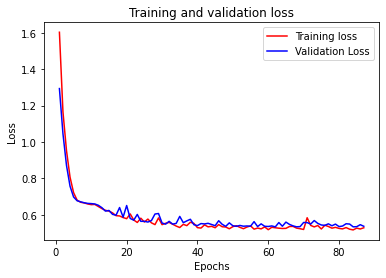

In [56]:
# Create a graph comparing training and validation loss
lossest = pd.DataFrame(model.history.history)
plt.plot(range(1, len(lossest)+1), lossest['loss'], color ='r', label = 'Training loss')
plt.plot(range(1, len(lossest)+1), lossest['val_loss'], color = 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

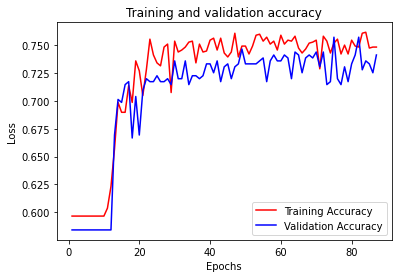

In [57]:
# Create a graph comparing training and validation accuracy
plt.plot(range(1, len(lossest)+1), lossest['accuracy'], color ='r', label = 'Training Accuracy')
plt.plot(range(1, len(lossest)+1), lossest['val_accuracy'], color = 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [58]:
# evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train_nn, verbose =0)
test_loss, test_acc = model.evaluate(X_test, y_test_nn, verbose =0)
print(f'Train loss:{round(train_loss, 2)};', f'Test loss:{round(test_loss, 2)}')
print(f'Train accuracy: {round(train_acc, 2)};', f'Test accuracy: {round(test_acc, 2)}')

Train loss:0.51; Test loss:0.54
Train accuracy: 0.75; Test accuracy: 0.74


In [59]:
y_pred_nn = np.where(model.predict(X_test) > 0.5, 1,0).flatten()
print(classification_report(y_test, y_pred_nn))

12/12 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       156
           1       0.76      0.82      0.79       219

    accuracy                           0.74       375
   macro avg       0.74      0.73      0.73       375
weighted avg       0.74      0.74      0.74       375



It perform slightly better than our tuned logistic Regression and Gradient Boosting Classifier models, but worse than MLPClassifier model  with an accuracy of 74%